In [2]:
# Predicting who survived in the Titanic (problem from Kaggle)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('C:/Users/minjo/MLdata/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

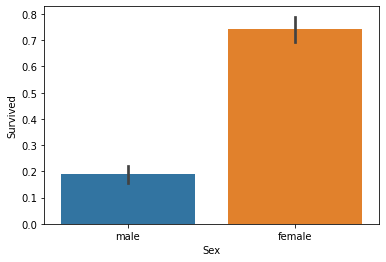

In [3]:
# compare the portion of people survived for each gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

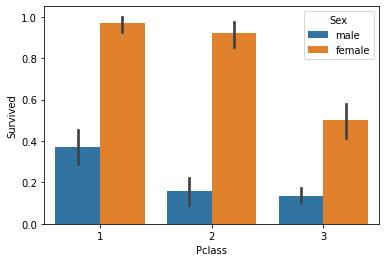

In [4]:
# How about Passenger Class, and gender?
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [5]:
from chapter2.transform_titanic_df import transform_features
print('All functions made up.')

All functions made up.


In [6]:
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
print('Features, Target data set up. Data split into train & test data.')

Features, Target data set up. Data split into train & test data.


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('Simple DecisionTreeClassifier Accuracy = ', np.round(accuracy_score(y_test, pred), 4))

Simple DecisionTreeClassifier Accuracy =  0.7877


In [8]:
from sklearn.model_selection import KFold
def execute_kfold(model, folds=5):
    kFold = KFold(n_splits=folds)
    accuracies = []
    times = 0
    for train_idx, test_idx in kFold.split(X_titanic_df):
        times += 1
        X_train, X_test = X_titanic_df.values[train_idx], X_titanic_df.values[test_idx]
        y_train, y_test = y_titanic_df.values[train_idx], y_titanic_df.values[test_idx]
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        accuracies.append(accuracy)
        print('Validation #{0} score: {1}'.format(times, np.round(accuracy, 4)))

    mean_score = np.mean(accuracies)
    print('Average Score: ', np.round(mean_score, 4))

execute_kfold(dt_clf, folds=5)

Validation #1 score: 0.7542
Validation #2 score: 0.7809
Validation #3 score: 0.7865
Validation #4 score: 0.7697
Validation #5 score: 0.8202
Average Score:  0.7823


In [9]:
from sklearn.model_selection import cross_val_score
# K-fold (or stratified K-fold) validation is done automatically
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, score in enumerate(scores):
    print('Validation #{0} score: {1}'.format(iter_count+1, np.round(score, 4)))

print('Average Accuracy: ', np.round(np.mean(scores), 4))

Validation #1 score: 0.743
Validation #2 score: 0.7753
Validation #3 score: 0.7921
Validation #4 score: 0.7865
Validation #5 score: 0.8427
Average Accuracy:  0.7879


In [10]:
# find the best parameters going into DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dtclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dtclf.fit(X_train, y_train)

print('GridSearchCV best parameter: ', grid_dtclf.best_params_)
print('GridSearchCV best accuracy score: ', grid_dtclf.best_score_)
best_model = grid_dtclf.best_estimator_
pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('Accuracy with best estimator model on test data: ', np.round(accuracy, 4))


GridSearchCV best parameter:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV best accuracy score:  0.7991825076332119
Accuracy with best estimator model on test data:  0.8715
